<h1 style="color:green;"> BIKE SHARING </h1>


## PROBLEM STATEMENT:

BoomBikes, a US-based bike-sharing provider, is facing challenges in sustaining revenue due to the COVID-19 pandemic. To prepare for the post-quarantine market scenario, they aim to understand the factors influencing the demand for shared bikes in the American market.

## OBJECTIVES:

- Identify significant variables that predict the demand for shared bikes.
- Assess how well these variables describe bike demands.
- Build a multiple linear regression model to predict bike demand based on available independent variables.
- Provide insights to management to adjust business strategies and meet customer expectations post-quarantine.
- Understand the demand dynamics of the new market to facilitate future decision-making.


## DATA SCENARIO:

BoomBikes has collected a large dataset on daily bike demands across the American market. The dataset includes various meteorological data and surveys about customer behavior. Key variables in the dataset include:

- Date
- Season
- Year

- Month
- Holiday status
- Weekday
- Working day status
- Weather situation
- Temperature
- Humidity
- Wind speed
- Counts of casual users, registered users, 
- and total rental bikes








## BUSINESS OBJECTIVE:

The primary goal is to model the demand for shared bikes using available independent variables. This model will help BoomBikes understand how demand varies with different features. By leveraging insights from the model, management can adjust business strategies to meet demand levels, enhance customer satisfaction, and drive revenue growth. Additionally, understanding the demand dynamics of the new market will enable BoomBikes to position itself competitively and capitalize on opportunities for expansion and innovation.


<h1 style='color:darkviolet'> Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h1 style='color:darkviolet'> Step 2: Load and Inspect Data

In [3]:
bikes= pd.read_csv(r'D:\UPGRAD_modules\Bike sharing\day.csv')

In [4]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikes.shape

(730, 16)

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h1 style='color:darkviolet'> Step 3: Data Preprocessing</H1>

- Handle missing values if any.
- Convert date time column.
- Mapping of the categorical variables to its respective values

In [8]:
# Converting dteday column to date object
bikes['dteday'] = pd.to_datetime(bikes['dteday'], format='%d-%m-%Y')

In [9]:
# Convert weathersit numbers to categories for better insights
bikes['weathersit'] = bikes['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}).astype('category')

In [10]:
# Convert season numbers to categories for better insights
bikes['season'] = bikes['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}).astype('category')

In [11]:
# Convert mnth and weekday datatype to category
bikes['mnth']= bikes['mnth'].astype('category')
bikes['weekday'] = bikes['weekday'].astype('category')

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(4), datetime64

# Checking for null values

In [13]:
# Check for null values
print(bikes.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There are no null values. Let's proceed with the analysis.

In [14]:
bikes.shape

(730, 16)

In this dataset, there are:
- 730 rows
- 16 columns

In [15]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h1 style='color:darkviolet'> STEP 4:  Data Visualizations

<h3 style="color:blue;"> Univariate Analysis

### Distribution of Key Numerical Features

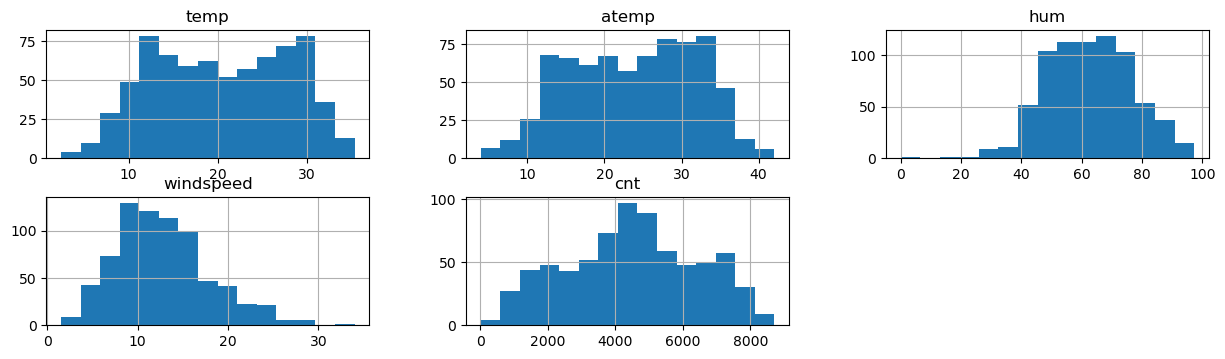

In [16]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bikes[numerical_features].hist(bins=15, figsize=(15, 6), layout=(3, 3))
plt.show()

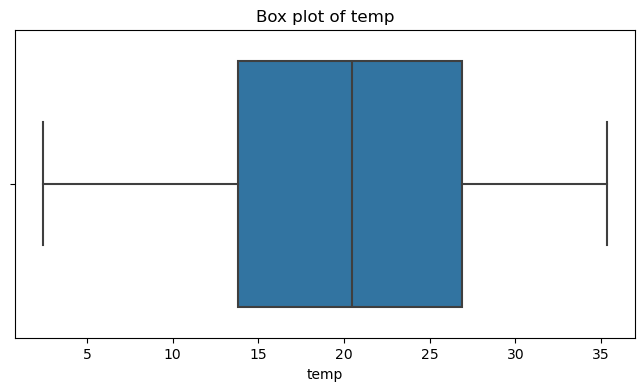

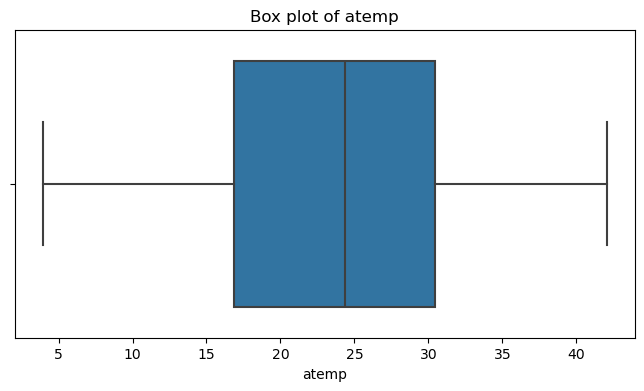

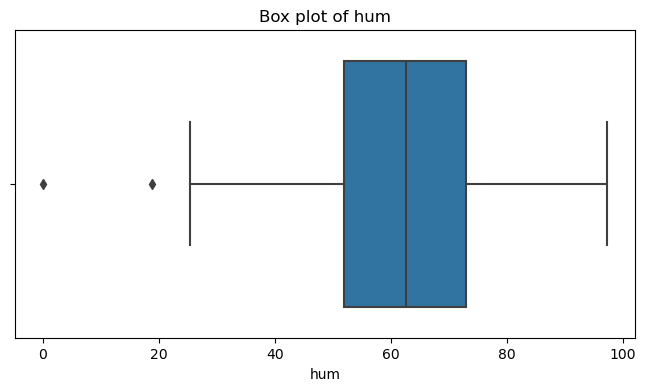

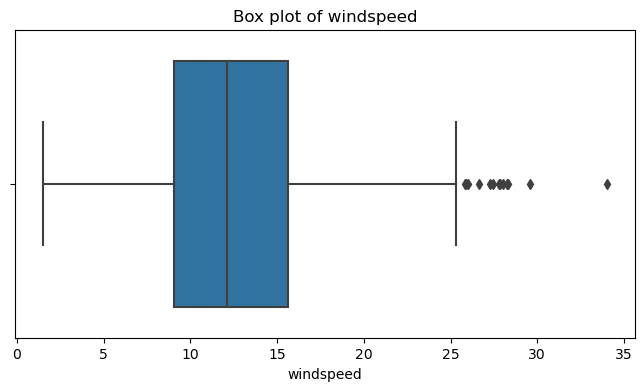

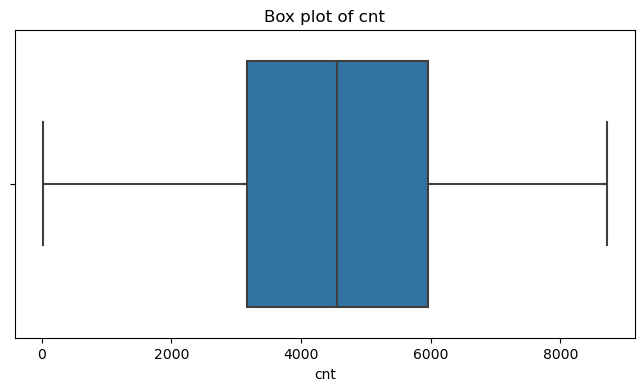

In [17]:
# Box plots to check for outliers in numerical columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=bikes[feature])
    plt.title('Box plot of {}'.format(feature))
    plt.show()

### Categorical Data Analysis

Analyze categorical variables such as season, weathersit, yr, mnth, and weekday.

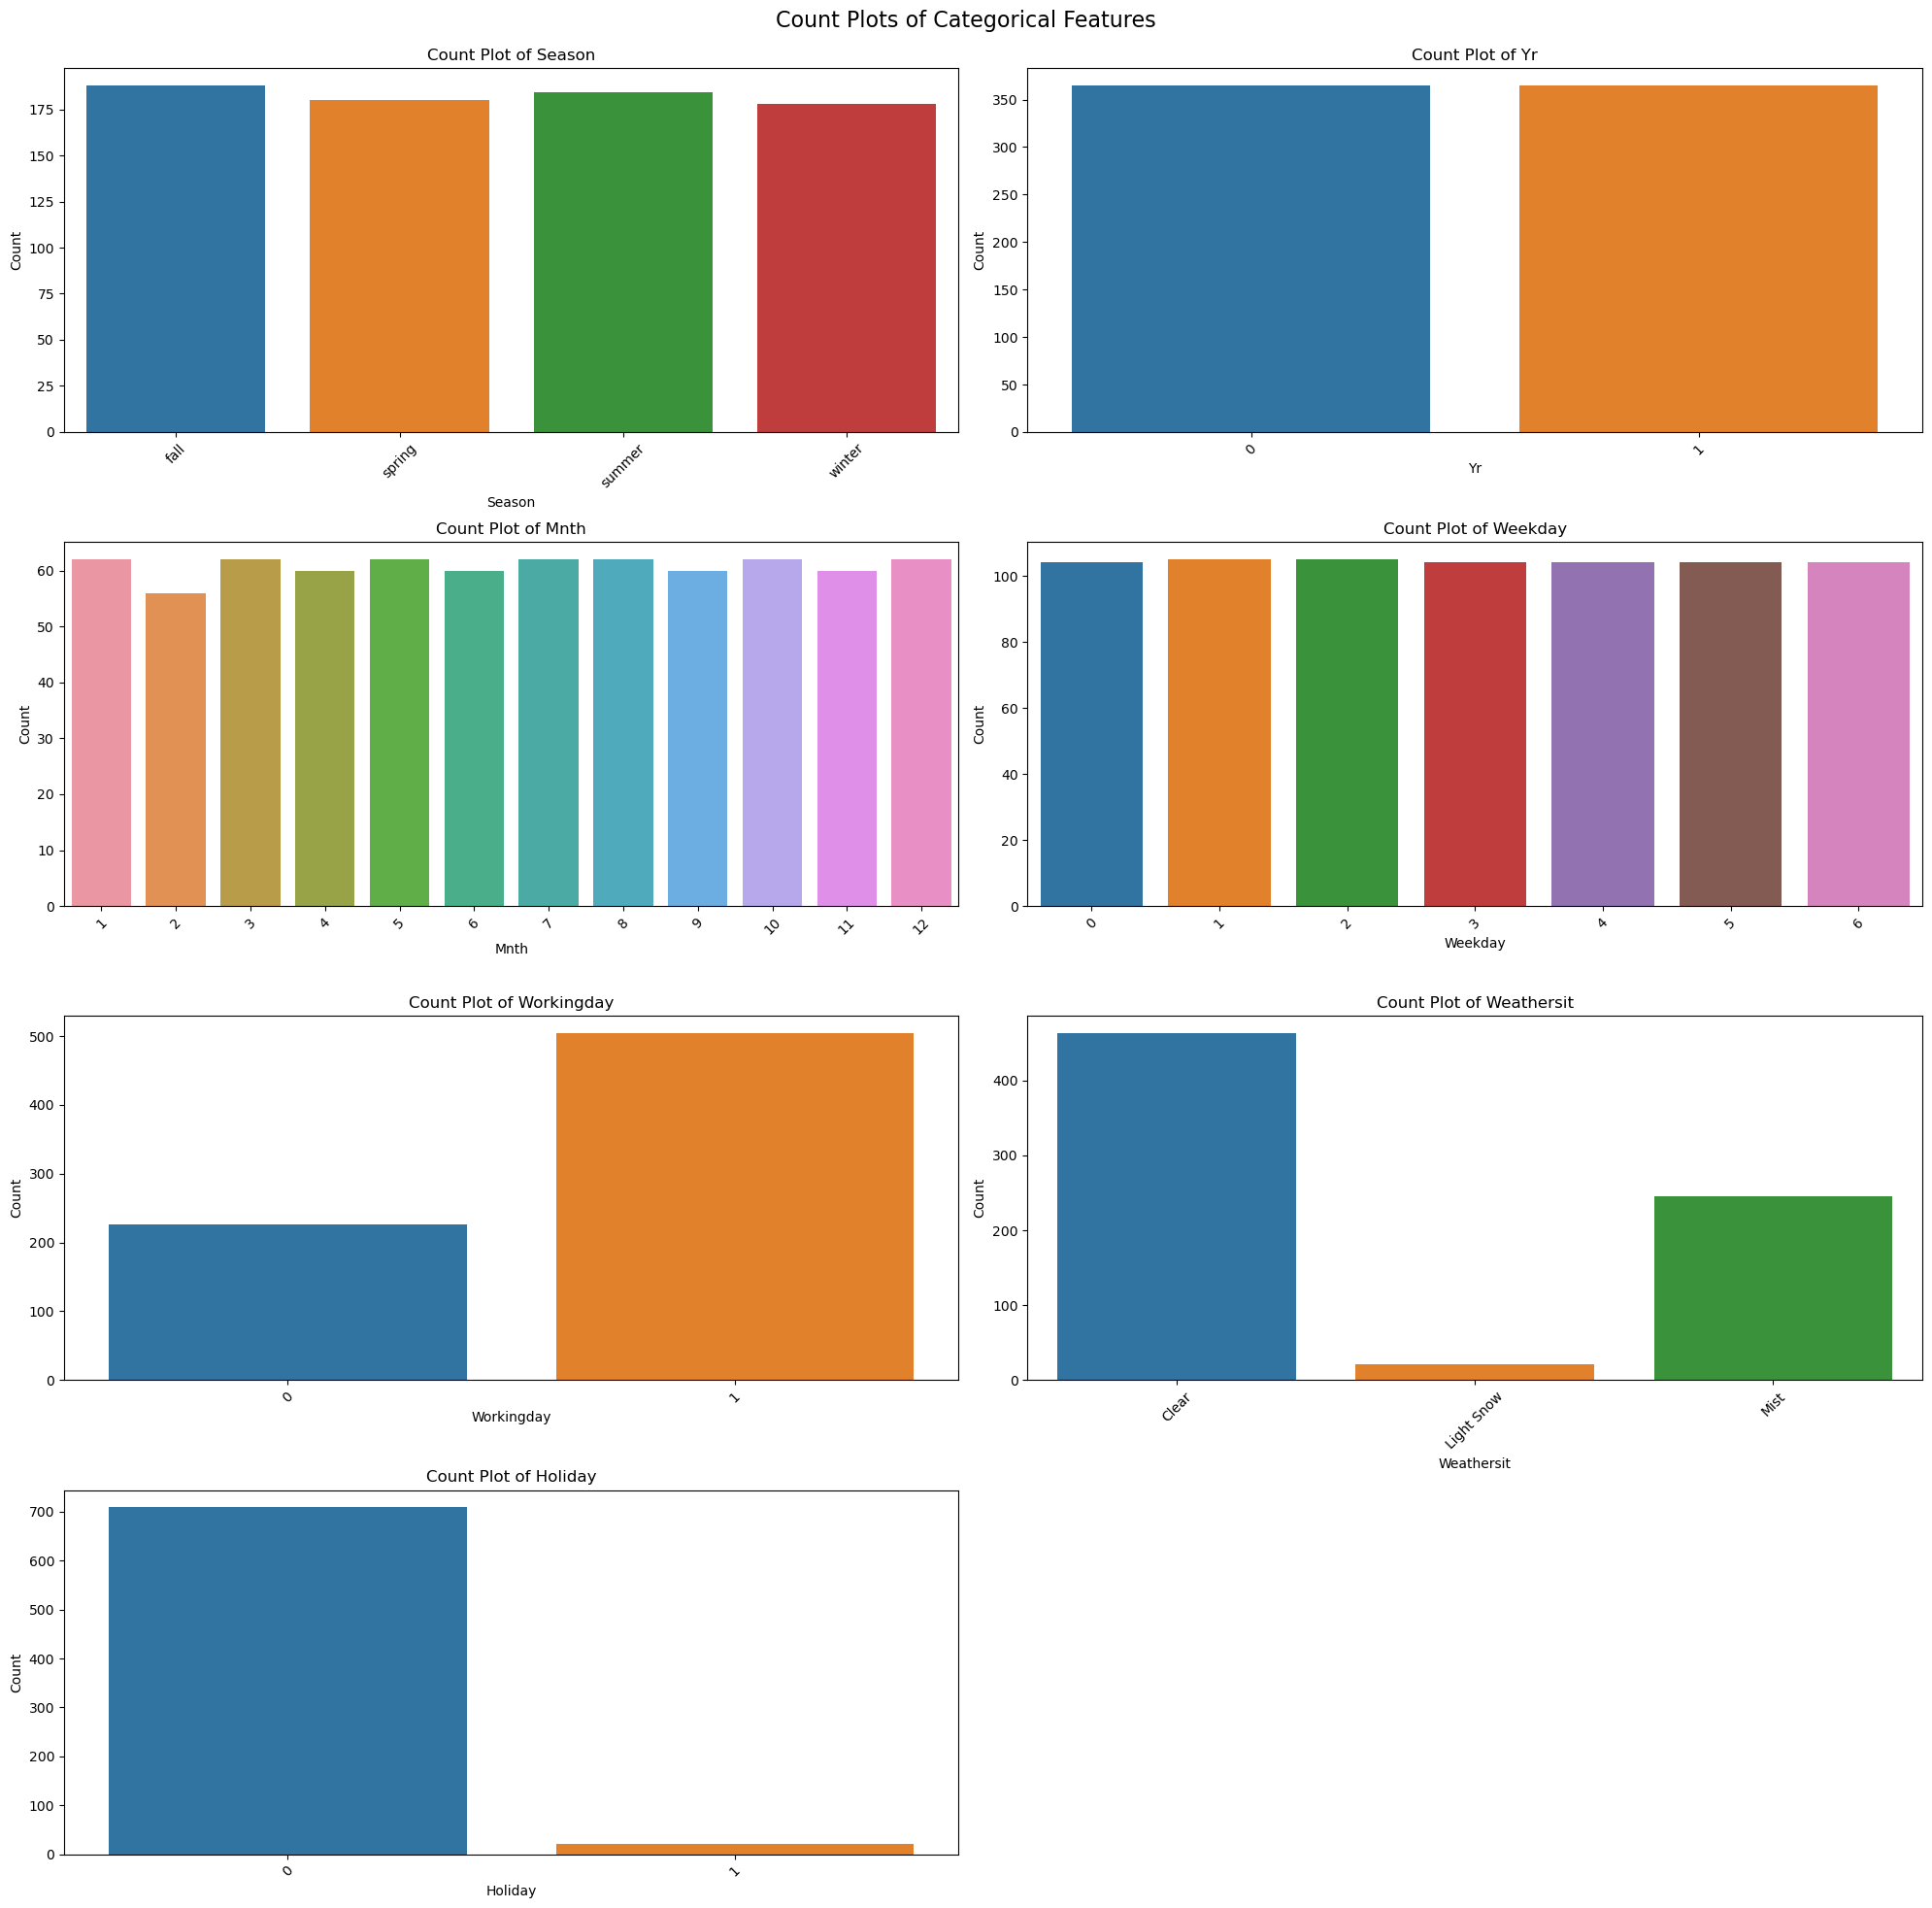

In [18]:
# List of categorical features to plot, ensuring 'weathersit' is not duplicated
categorical_features = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'holiday']

# Determine the layout of the subplots
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 5))  # Width and height of each subplot
fig.suptitle('Count Plots of Categorical Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical features and create a count plot for each one
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=bikes, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplot axes (if number of plots < n_rows * n_cols)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap of plots and titles/subtitles
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top margin to accommodate the main title

# Display the plot
plt.show()

<h3 style="color:blue;"> Multivariate  Analysis

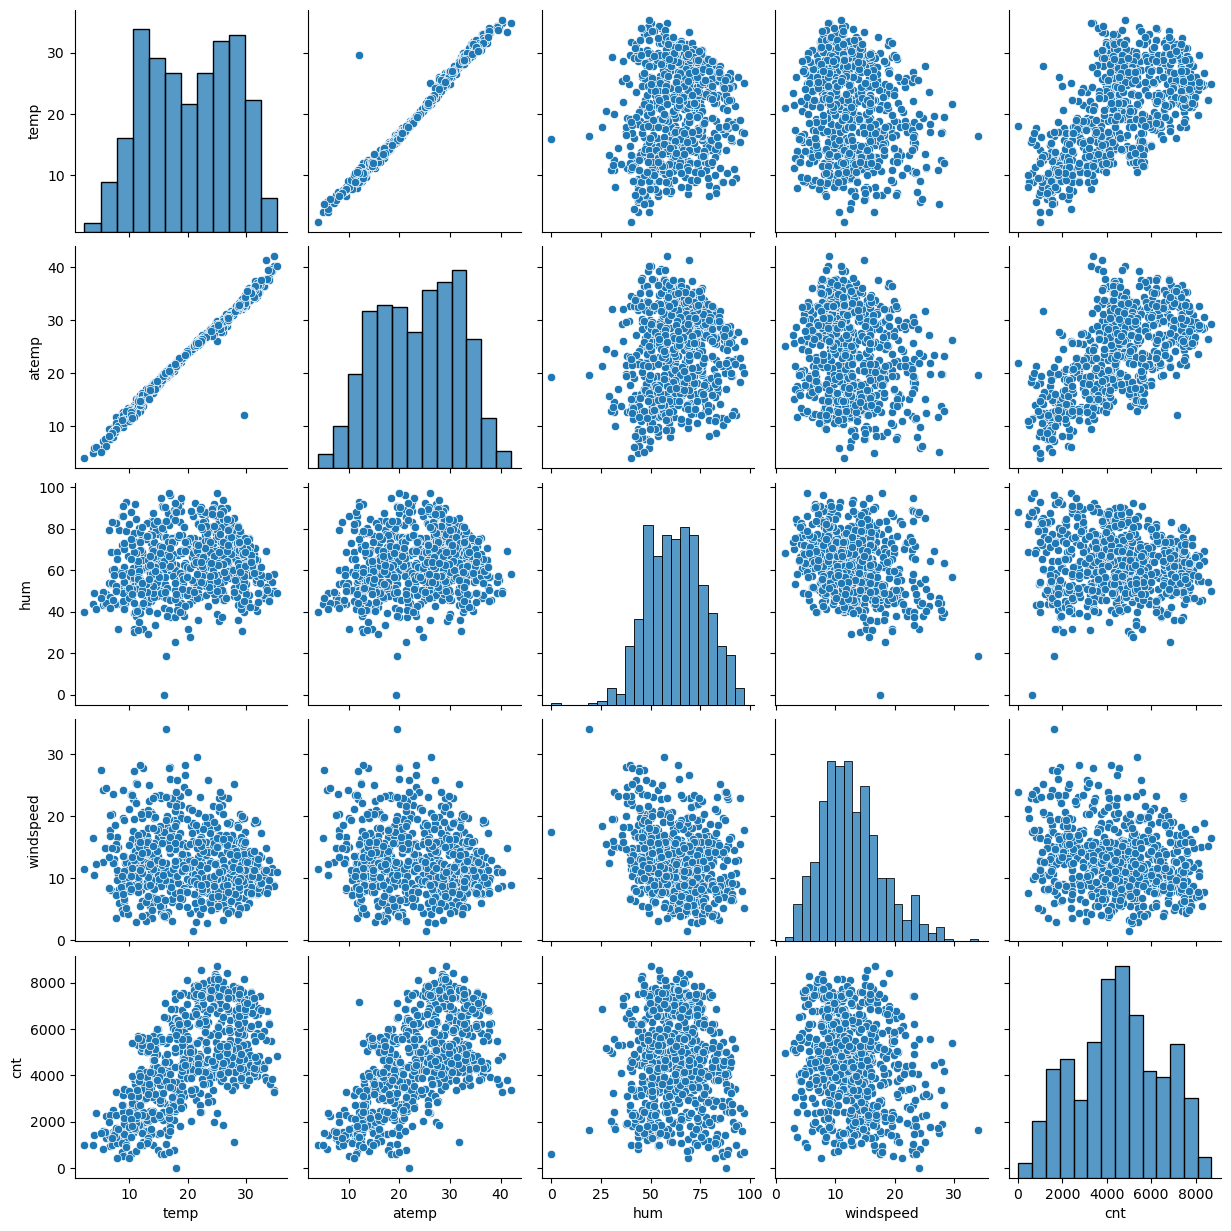

In [19]:
# Pair plot to visualize relationships between numerical features and target variable
sns.pairplot(bikes, vars=['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()

**Insights**

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'.

<h3 style="color:blue;"> Bivariate Analysis

### Relationship Between Features and Target Variable

#### Box plots for categorical features

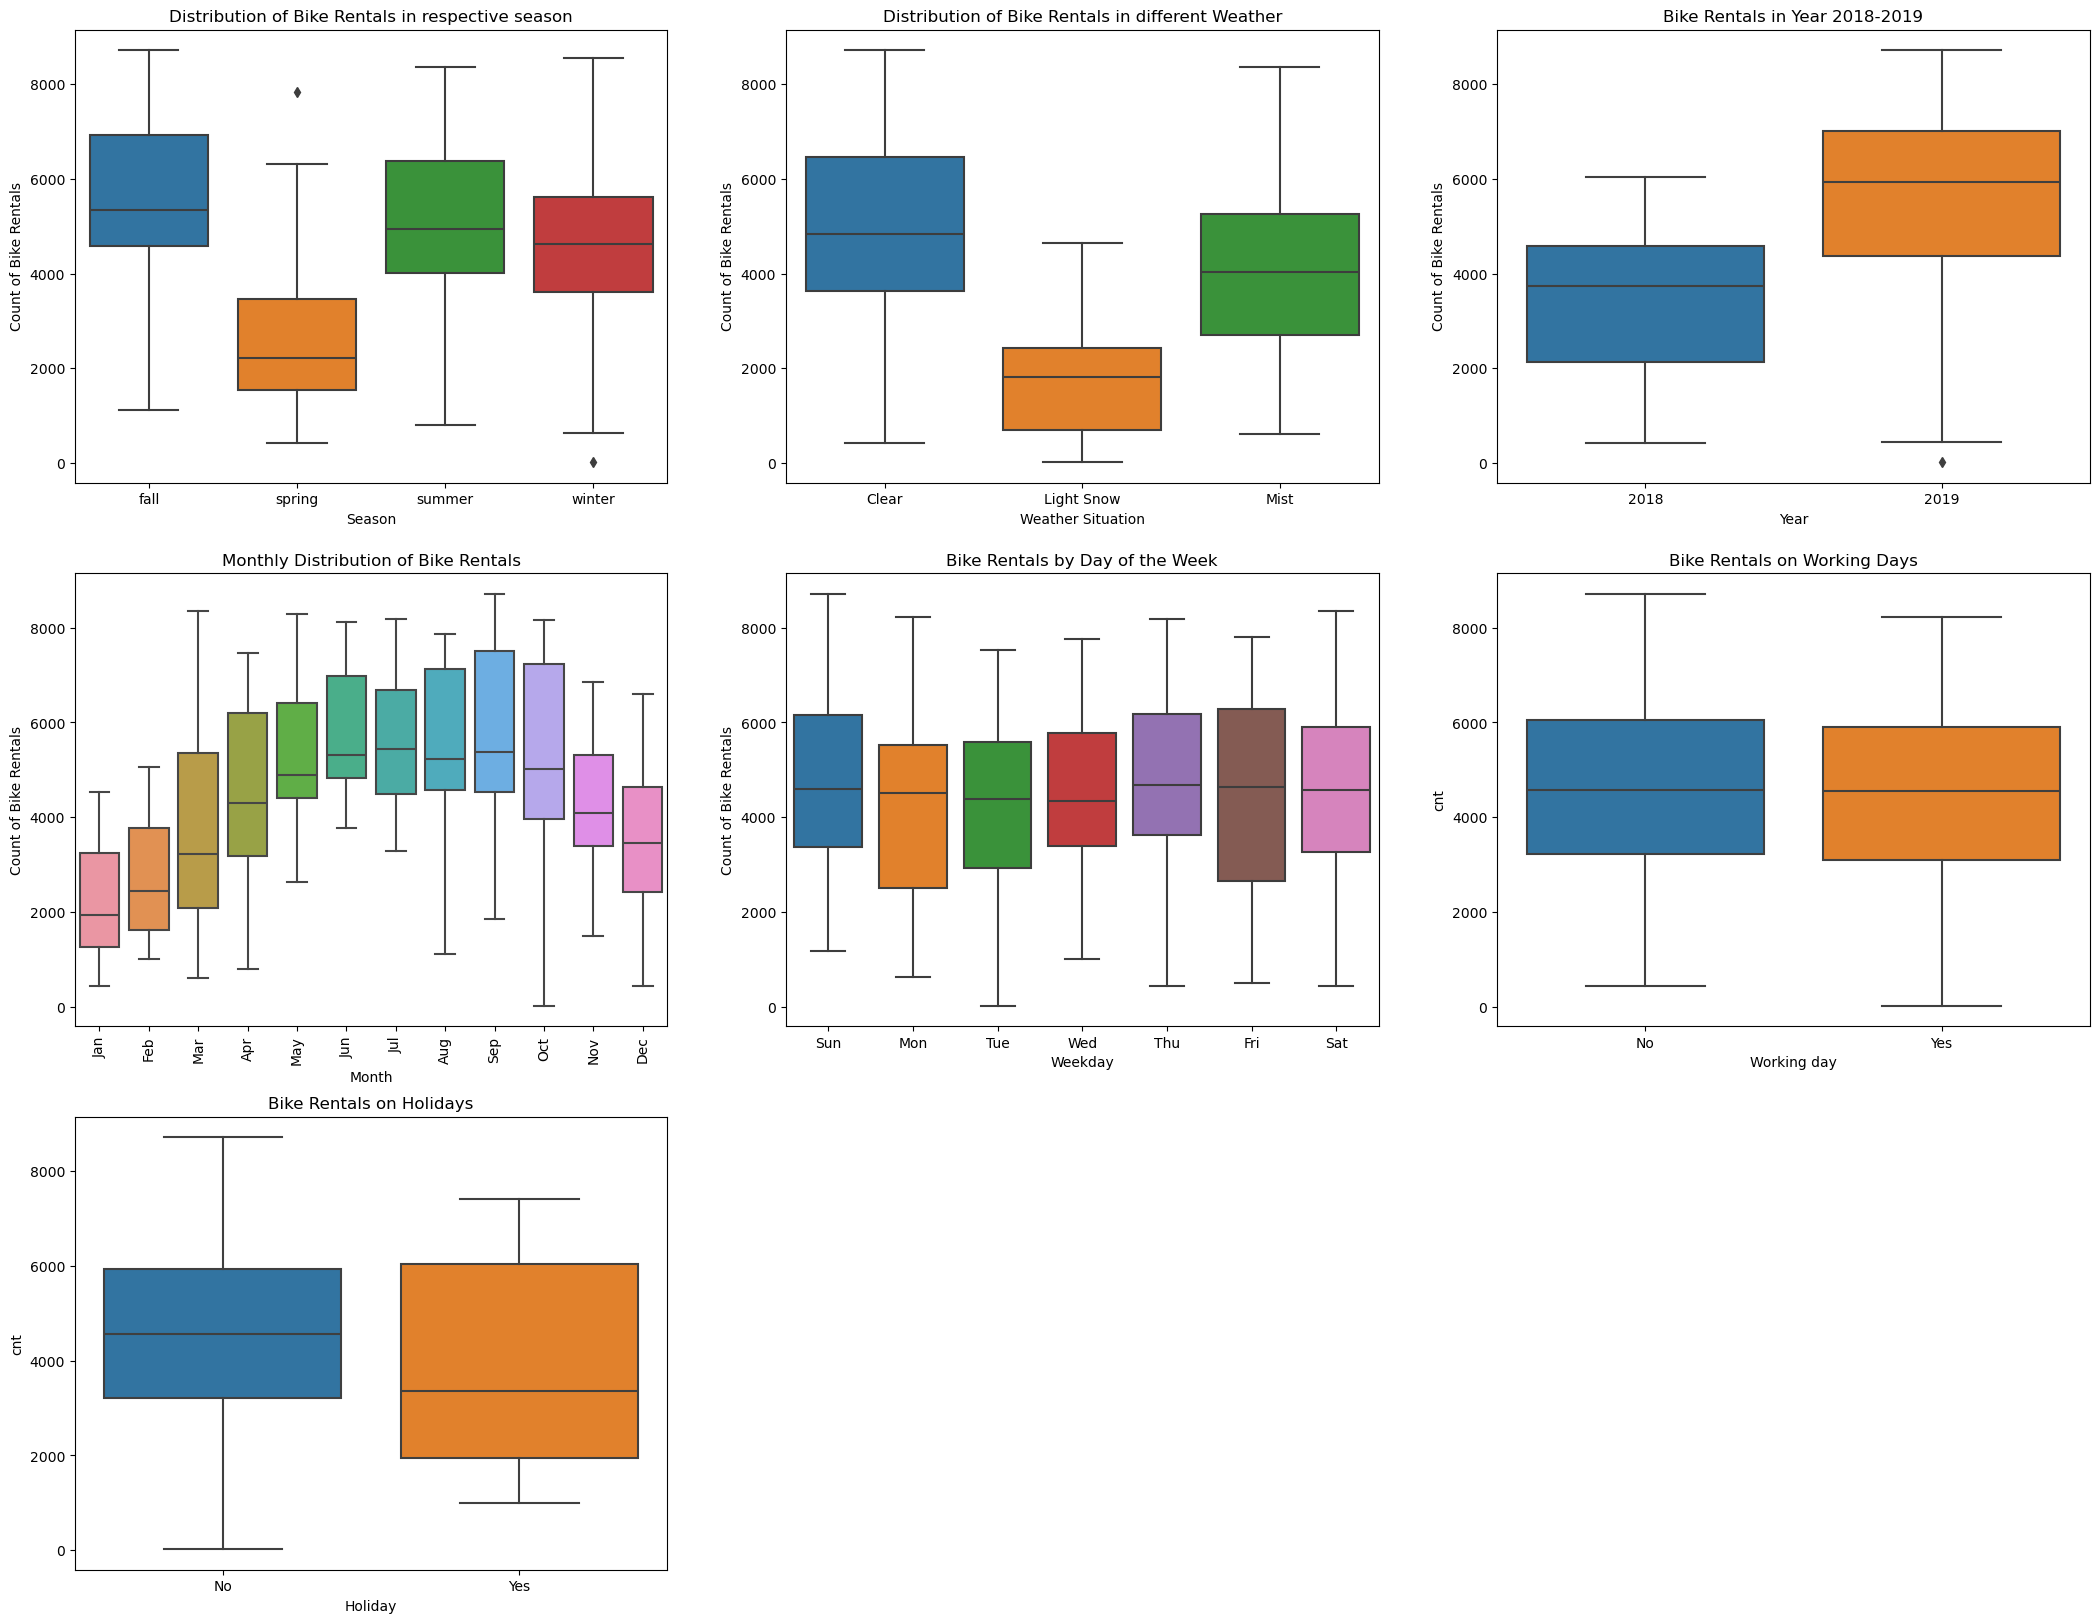

In [20]:
# Box plots for categorical features

plt.figure(figsize=(26,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.xlabel('Season')
plt.ylabel('Count of Bike Rentals')
plt.title('Distribution of Bike Rentals in respective season')

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.xlabel('Weather Situation')
plt.ylabel('Count of Bike Rentals')
plt.title('Distribution of Bike Rentals in different Weather')

plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
# Set the x-axis labels
plt.xlabel('Year')
plt.ylabel('Count of Bike Rentals')
plt.title('Bike Rentals in Year 2018-2019')
plt.xticks([0, 1], ['2018', '2019'])

plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
# Set labels and title for better readability and understanding
plt.xlabel('Month')
plt.ylabel('Count of Bike Rentals')
plt.title('Monthly Distribution of Bike Rentals')
# Optionally, enhance x-axis labels for better readability
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, 12), labels=month_labels, rotation=90)  # Ensuring the labels match your data encoding


plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
# Set labels for better clarity
plt.xlabel('Weekday')
plt.ylabel('Count of Bike Rentals')
plt.title('Bike Rentals by Day of the Week')
# Optionally, improve x-axis labels for readability
weekday_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=range(0, 7), labels=weekday_labels)  # Ensuring the labels match your data encoding


plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.xlabel('Working day')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Bike Rentals on Working Days')

plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.xlabel('Holiday')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Bike Rentals on Holidays')
plt.show()

### Insights:

#### Season:
- Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). 
- This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

#### Weather Situation:
- Almost 67% of the bike booking were happening during 'Clear' with a median of close to 5000 booking (for the period of 2 years). 
- This was followed by 'Mist' with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

#### Year:
- The rise in sales between 2018 and 2019, with the median increasing from around 4000 in 2018 to 6000 in 2019, suggests that the business is performing positively.

#### Month:
- Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- #### July and August have higher median rental counts than May.

By examining the graph, we can see that the median lines within the boxes for July and August are above the median line for May, suggesting that these months have higher median rental counts. The dataset confirms that the median rental counts for July and August are indeed higher than the median for May.

- #### Bike rentals generally increase from January to September.

The graph illustrates a general increase in the median bike rental counts from January through September, which is corroborated by the dataset. This trend is shown by the ascending median lines within the boxes on the graph and is reflected in the dataset's rising median counts during these months, peaking around September before starting to decline.

#### Weekday:
- This variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. Let the model decide if this needs be added or not.

#### Working day:
- Almost 69% of the bike booking were happening in working days and non- working days with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

#### Holiday:
- Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

### Bar plots for Categorical Features

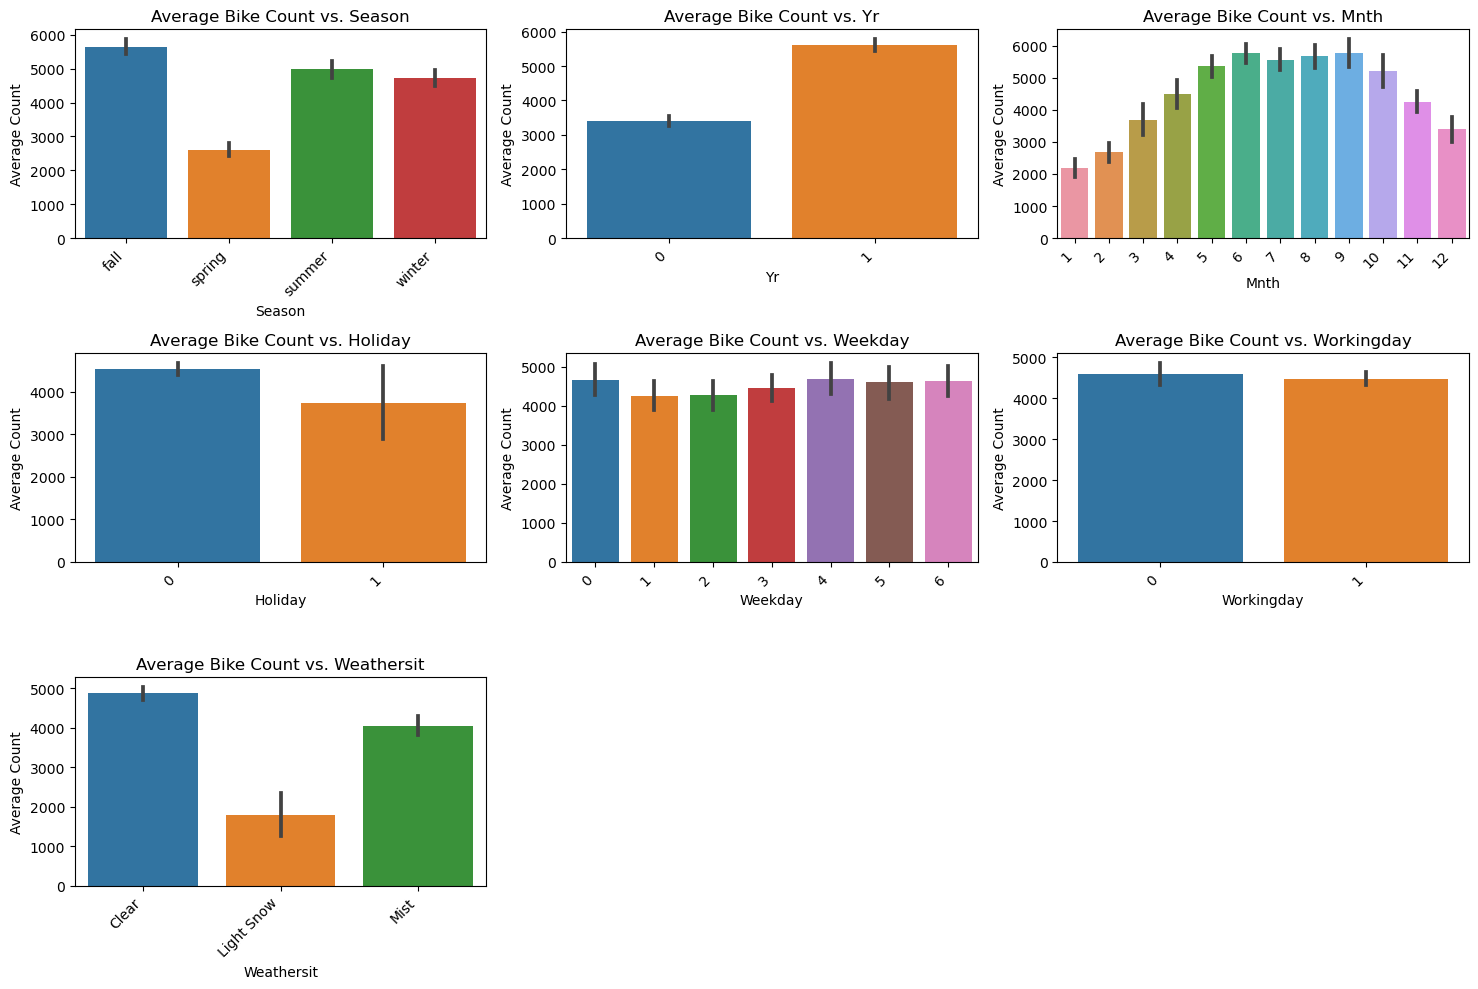

In [21]:
# Bar plots for categorical features
# Categorical features to plot
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Number of rows/columns for the subplot grid
n_rows = 3
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical features and create bar plots
for i, feature in enumerate(categorical_features):
    # Plot only as many plots as there are features
    if i < len(categorical_features):
        sns.barplot(x=feature, y='cnt', data=bikes, estimator=np.mean, ax=axes[i])
        axes[i].set_title('Average Bike Count vs. {}'.format(feature.capitalize()))
        axes[i].set_xlabel(feature.capitalize())
        axes[i].set_ylabel('Average Count')
        # Rotate x labels for better readability if necessary
        for label in axes[i].get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Hide axes that are not used (if any)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

#### Insights:

- During **holidays**, the average number of bike rentals is higher compared to non-holidays.
- Bike rentals are expected to be higher during the **Light Snow** weather condition compared to other weather situations.

### Pair plot to visualize relationships between numerical features

<Figure size 1200x800 with 0 Axes>

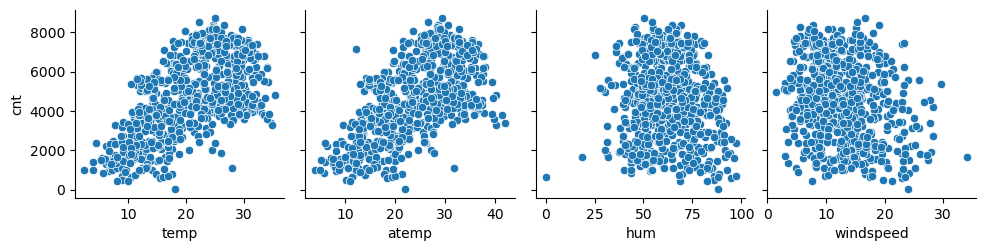

In [22]:
# Pair plot to visualize relationships between numerical features and target variable
plt.figure(figsize=(12,8))
sns.pairplot(data=bikes, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt')
plt.show()

#### Insights:

There is a linear relationship between key predictors the target variable.

<h2 style="color:blue;"> Year-over-Year Analysis of Business Growth (2018 - 2019)

<h3 style="color:brown;"> Yearly Bike Rentals by Season (2018-2019)

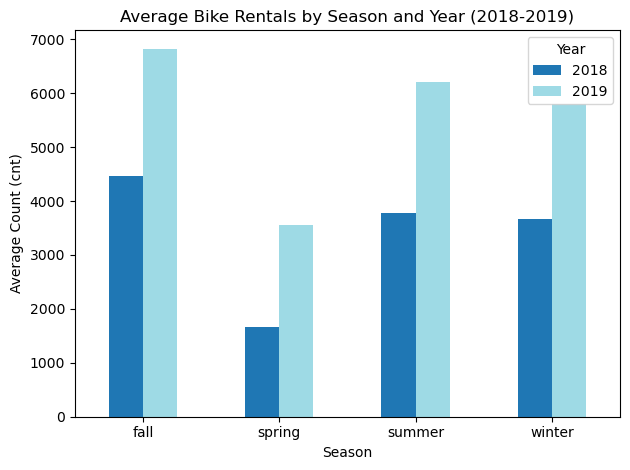

In [23]:
# Filter data for years 2018 and 2019
df_filtered = bikes[(bikes['yr'] == 0) | (bikes['yr'] == 1)]

# Calculate average 'cnt' for each season in each year
season_cnt_avg = df_filtered.groupby(['season', 'yr'])['cnt'].mean().unstack()

# Create a bar chart
season_cnt_avg.plot(kind='bar', colormap='tab20')
plt.xlabel('Season')
plt.ylabel('Average Count (cnt)')
plt.title('Average Bike Rentals by Season and Year (2018-2019)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Year', labels=['2018', '2019'])
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Bike Rentals by Month and Year

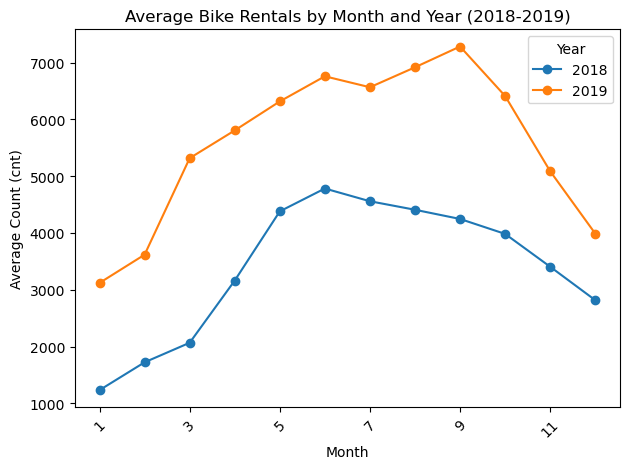

In [24]:
# Calculate average 'cnt' for each month in each year
month_cnt_avg = df_filtered.groupby(['mnth', 'yr'])['cnt'].mean().unstack()

# Create a line chart (or other chart type as desired)
month_cnt_avg.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Count (cnt)')
plt.title('Average Bike Rentals by Month and Year (2018-2019)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with months
plt.legend(title='Year', labels=['2018', '2019'])
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Bike Rentals by Holiday and Year

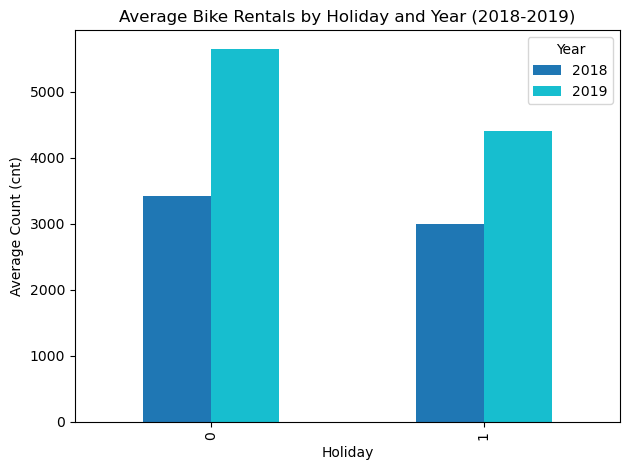

In [25]:
# Calculate average 'cnt' for holiday types in each year
holiday_cnt_avg = df_filtered.groupby(['holiday', 'yr'])['cnt'].mean().unstack()

# Create a bar chart
holiday_cnt_avg.plot(kind='bar', colormap='tab10')
plt.xlabel('Holiday')
plt.ylabel('Average Count (cnt)')
plt.title('Average Bike Rentals by Holiday and Year (2018-2019)')
plt.legend(title='Year', labels=['2018', '2019'])
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Bike Rentals by Weekday and Year

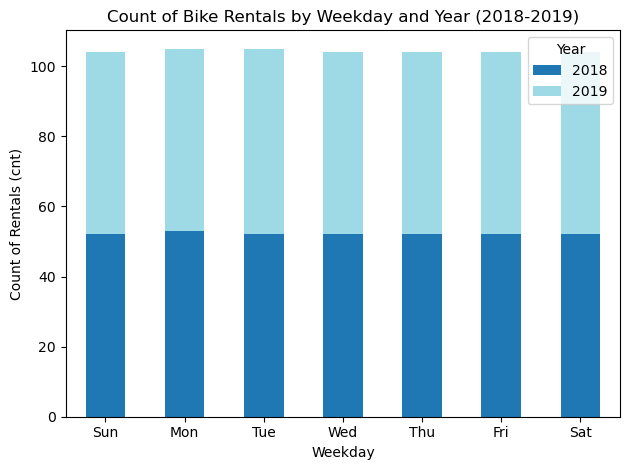

In [26]:
# Count occurrences of 'weekday' in each year
weekday_cnt = df_filtered.groupby(['weekday', 'yr'])['cnt'].count().unstack()

# Create a stacked bar chart (or other chart type as desired)
weekday_cnt.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('Weekday')  
plt.ylabel('Count of Rentals (cnt)')
plt.title('Count of Bike Rentals by Weekday and Year (2018-2019)')
weekday_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=range(0, 7), rotation=0, labels=weekday_labels)  # Ensuring the labels match your data encoding
#plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Year', labels=['2018', '2019'])
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Bike Rentals by Working Day and Year

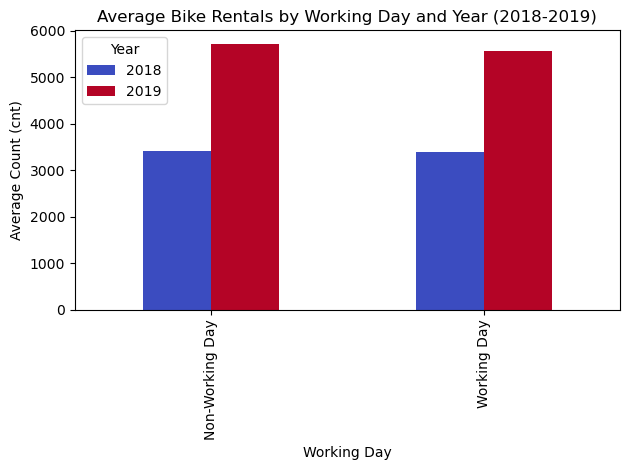

In [27]:
# Calculate average 'cnt' for working day types in each year
workingday_cnt_avg = df_filtered.groupby(['workingday', 'yr'])['cnt'].mean().unstack()

# Create a bar chart
workingday_cnt_avg.plot(kind='bar', colormap='coolwarm')
plt.xlabel('Working Day')  # 'workingday' likely has values 0 (False) or 1 (True)
plt.ylabel('Average Count (cnt)')
plt.title('Average Bike Rentals by Working Day and Year (2018-2019)')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])  # Set custom labels for 0 and 1
plt.legend(title='Year', labels=['2018', '2019'])
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Bike Rentals by Weather Condition and Year

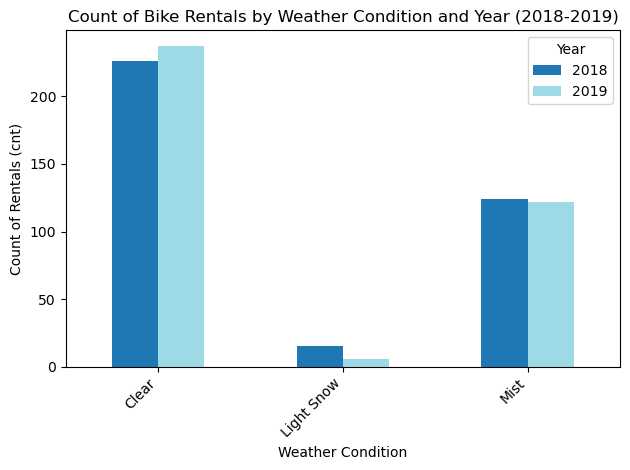

In [28]:
# Count occurrences of 'weathersit' in each year
weathersit_cnt = df_filtered.groupby(['weathersit', 'yr'])['cnt'].count().unstack(fill_value=0)  # Handles potential missing weather categories

# Create a bar chart
weathersit_cnt.plot(kind='bar', stacked=False, colormap='tab20')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Rentals (cnt)')
plt.title('Count of Bike Rentals by Weather Condition and Year (2018-2019)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability 
plt.legend(title='Year', labels=['2018', '2019'])
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Bike Rentals by Temperature and Year (2018-2019)

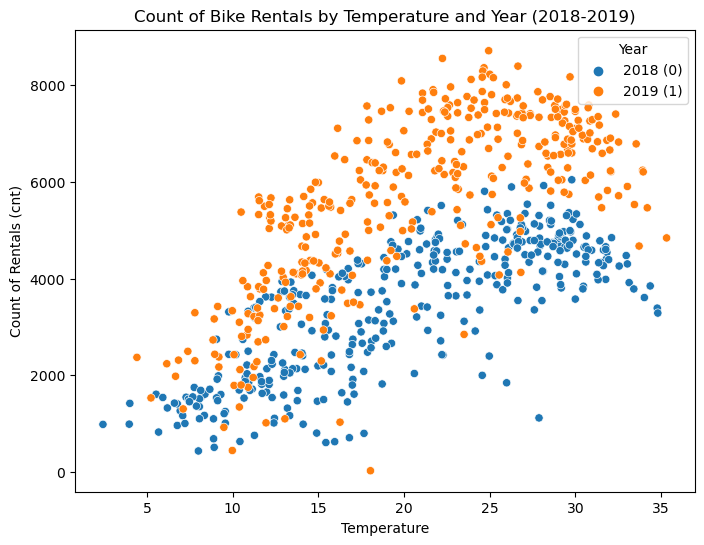

In [29]:
# Create a scatterplot with hue for 'yr'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', hue='yr', data=bikes)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing legend elements
plt.legend(handles, [f"{year} ({label})" for year, label in zip([2018, 2019], labels)], title='Year')
plt.title('Count of Bike Rentals by Temperature and Year (2018-2019)')
plt.xlabel('Temperature')
plt.ylabel('Count of Rentals (cnt)')

plt.show()

<h3 style="color:brown;"> Feeling Temperature vs. Bicycle Rentals in Year (2018-2019)

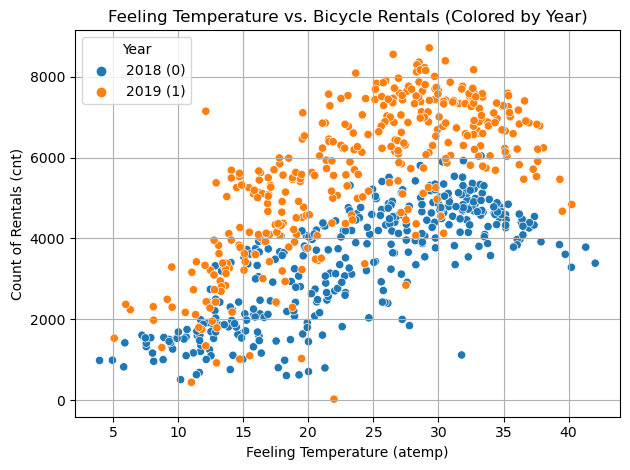

In [30]:
# Create a scatterplot with hue for 'yr'
sns.scatterplot(x='atemp', y='cnt', hue='yr', data=bikes)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing legend elements
plt.legend(handles, [f"{year} ({label})" for year, label in zip([2018, 2019], labels)], title='Year')

plt.xlabel('Feeling Temperature (atemp)')  # Adjust label if needed
plt.ylabel('Count of Rentals (cnt)')
plt.title('Feeling Temperature vs. Bicycle Rentals (Colored by Year)')

plt.grid(True)
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Humidity vs. Bicycle Rentals

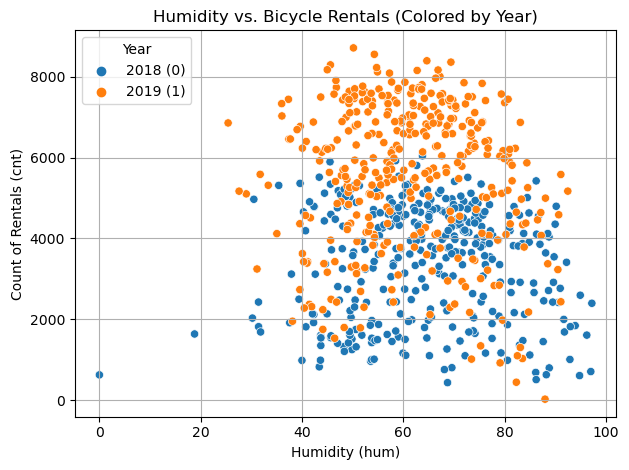

In [31]:
# Create a scatterplot with hue for 'yr'
sns.scatterplot(x='hum', y='cnt', hue='yr', data=bikes)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing legend elements
plt.legend(handles, [f"{year} ({label})" for year, label in zip([2018, 2019], labels)], title='Year')

plt.xlabel('Humidity (hum)')
plt.ylabel('Count of Rentals (cnt)')
plt.title('Humidity vs. Bicycle Rentals (Colored by Year)')
plt.grid(True)
plt.tight_layout()
plt.show()



<h3 style="color:brown;"> Wind Speed vs. Bicycle Rentals

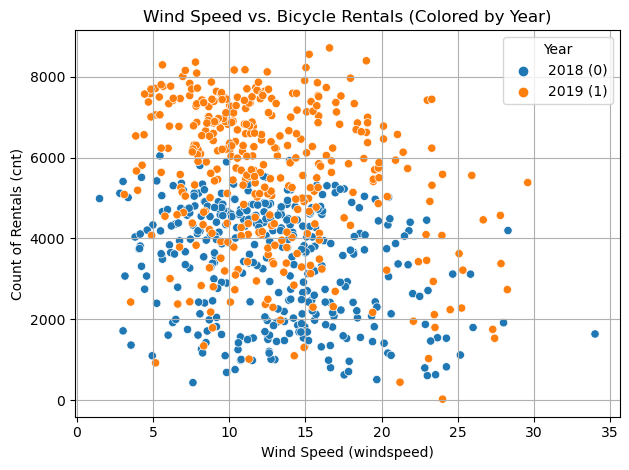

In [32]:
# Create a scatterplot with hue for 'yr'
sns.scatterplot(x='windspeed', y='cnt', hue='yr', data=bikes)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing legend elements
plt.legend(handles, [f"{year} ({label})" for year, label in zip([2018, 2019], labels)], title='Year')

plt.xlabel('Wind Speed (windspeed)')
plt.ylabel('Count of Rentals (cnt)')
plt.title('Wind Speed vs. Bicycle Rentals (Colored by Year)')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Casual Riders vs. Total Rentals

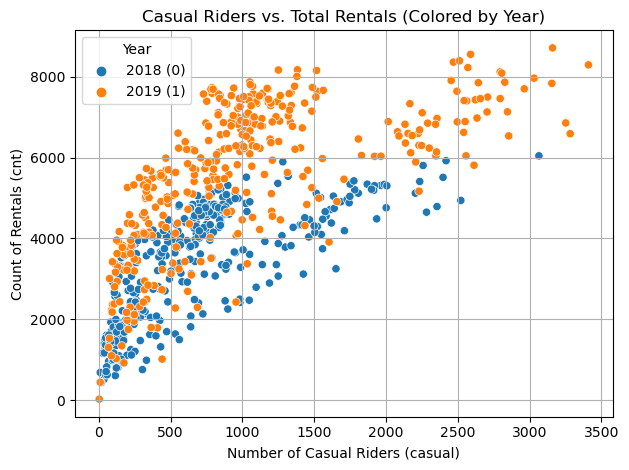

In [33]:
# Create a scatterplot with hue for 'yr'
sns.scatterplot(x='casual', y='cnt', hue='yr', data=bikes)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing legend elements
plt.legend(handles, [f"{year} ({label})" for year, label in zip([2018, 2019], labels)], title='Year')

plt.xlabel('Number of Casual Riders (casual)')
plt.ylabel('Count of Rentals (cnt)')
plt.title('Casual Riders vs. Total Rentals (Colored by Year)')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 style="color:brown;"> Registered Riders vs. Total Rentals

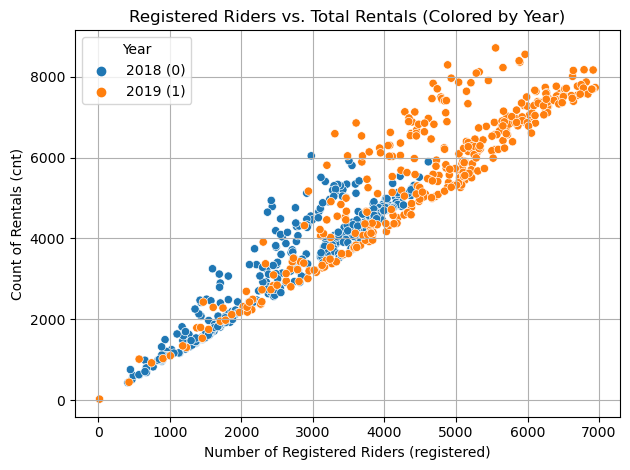

In [34]:
# Create a scatterplot with hue for 'yr'
sns.scatterplot(x='registered', y='cnt', hue='yr', data=bikes)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing legend elements
plt.legend(handles, [f"{year} ({label})" for year, label in zip([2018, 2019], labels)], title='Year')

plt.xlabel('Number of Registered Riders (registered)')
plt.ylabel('Count of Rentals (cnt)')
plt.title('Registered Riders vs. Total Rentals (Colored by Year)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Number of Holidays

How many days in the data set have been marked as holidays?

In [35]:
bikes['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

### CORRELATION ANALYSIS 

Check the correlations among numerical features and with the target variable.

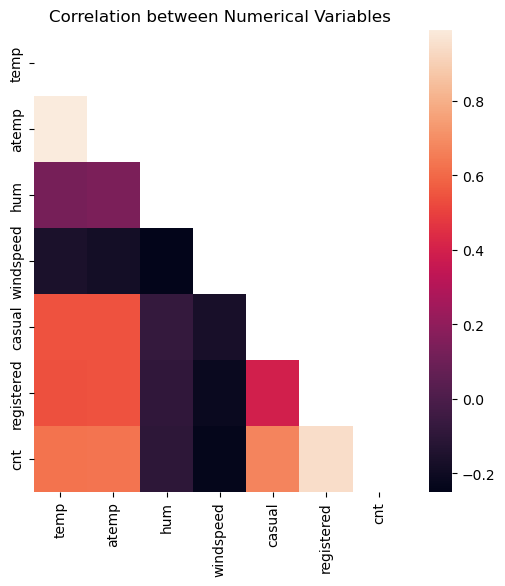

In [36]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikes[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr())
sns.heatmap(bikes[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(), annot = True,  mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

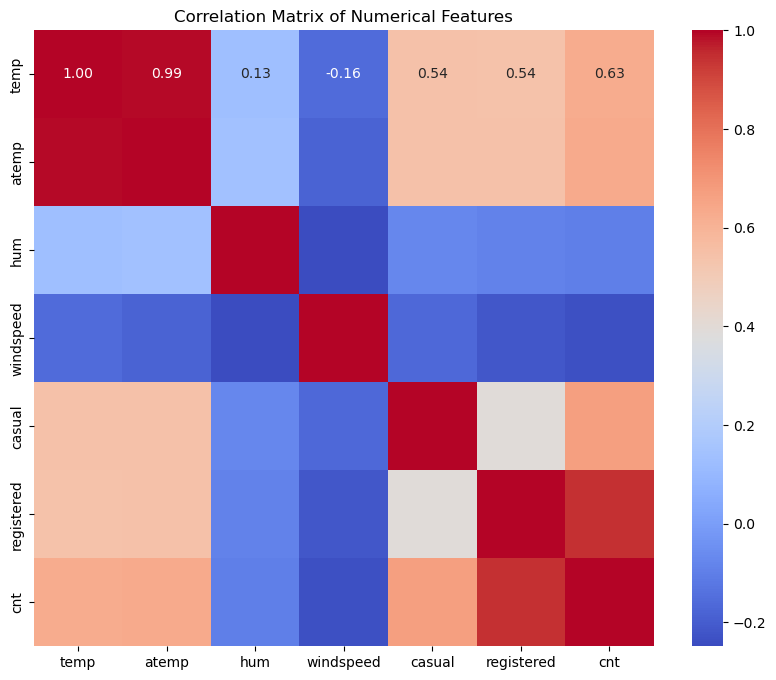

In [37]:
# List of numerical features in the dataset
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered' ,'cnt']

# Computing the correlation matrix for numerical features only
correlation_matrix = bikes[numerical_features].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [38]:
correlation_matrix

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


- Wind speed (windspeed) has a negative correlation with the count of total bike rentals (cnt).

- According to the correlation heatmap and matrix, wind speed (windspeed) has a negative correlation with the count of total bike rentals (cnt), approximately -0.235, which confirms that this statement is correct.

In [39]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(4), datetime64

In [40]:
cols_to_drop = ['instant','dteday','casual','registered']

In [41]:
bikes= bikes.drop(cols_to_drop, axis=1)

In [42]:
bikes.shape

(730, 12)

<h1 style='color:darkviolet'> Step 5: Prepare Data for Modeling</H1>

- Define independent variables (X) and the target variable (y).
- Split the dataset into training and testing sets.

In [43]:
# Create dummies for categorical variables and store it in a new variable - 'dummy_data'
bikes_data = pd.get_dummies(bikes, columns=['mnth', 'weekday', 'weathersit', 'season'], drop_first=True)

In [44]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   mnth_2                 730 non-null    bool   
 9   mnth_3                 730 non-null    bool   
 10  mnth_4                 730 non-null    bool   
 11  mnth_5                 730 non-null    bool   
 12  mnth_6                 730 non-null    bool   
 13  mnth_7                 730 non-null    bool   
 14  mnth_8                 730 non-null    bool   
 15  mnth_9

In [45]:
bikes_data.shape

(730, 30)

<h1 style='color:darkviolet'> Step 6: Splitting the Data into Training and Testing Sets</h1>

As you know, the first basic step for regression is performing a train-test split.

In [46]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
df_train.shape

(510, 30)

### Rescaling the Features

In [48]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [49]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist,season_spring,season_summer,season_winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,False,False,...,False,True,False,False,False,False,False,False,False,True
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,True,False,False,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,True,...,False,False,False,False,False,False,True,True,False,False
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,False,False,...,False,False,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,False,False,False,False,False,False,True,False,True,False


In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
# verifying the head after appying scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,...,False,True,False,False,False,False,False,False,False,True
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,True,False,False,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,True,...,False,False,False,False,False,False,True,True,False,False
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,False,False,...,False,False,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,False,False,False,False,False,False,True,False,True,False


In [52]:
# Checking the numerical statistics of the data frame
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


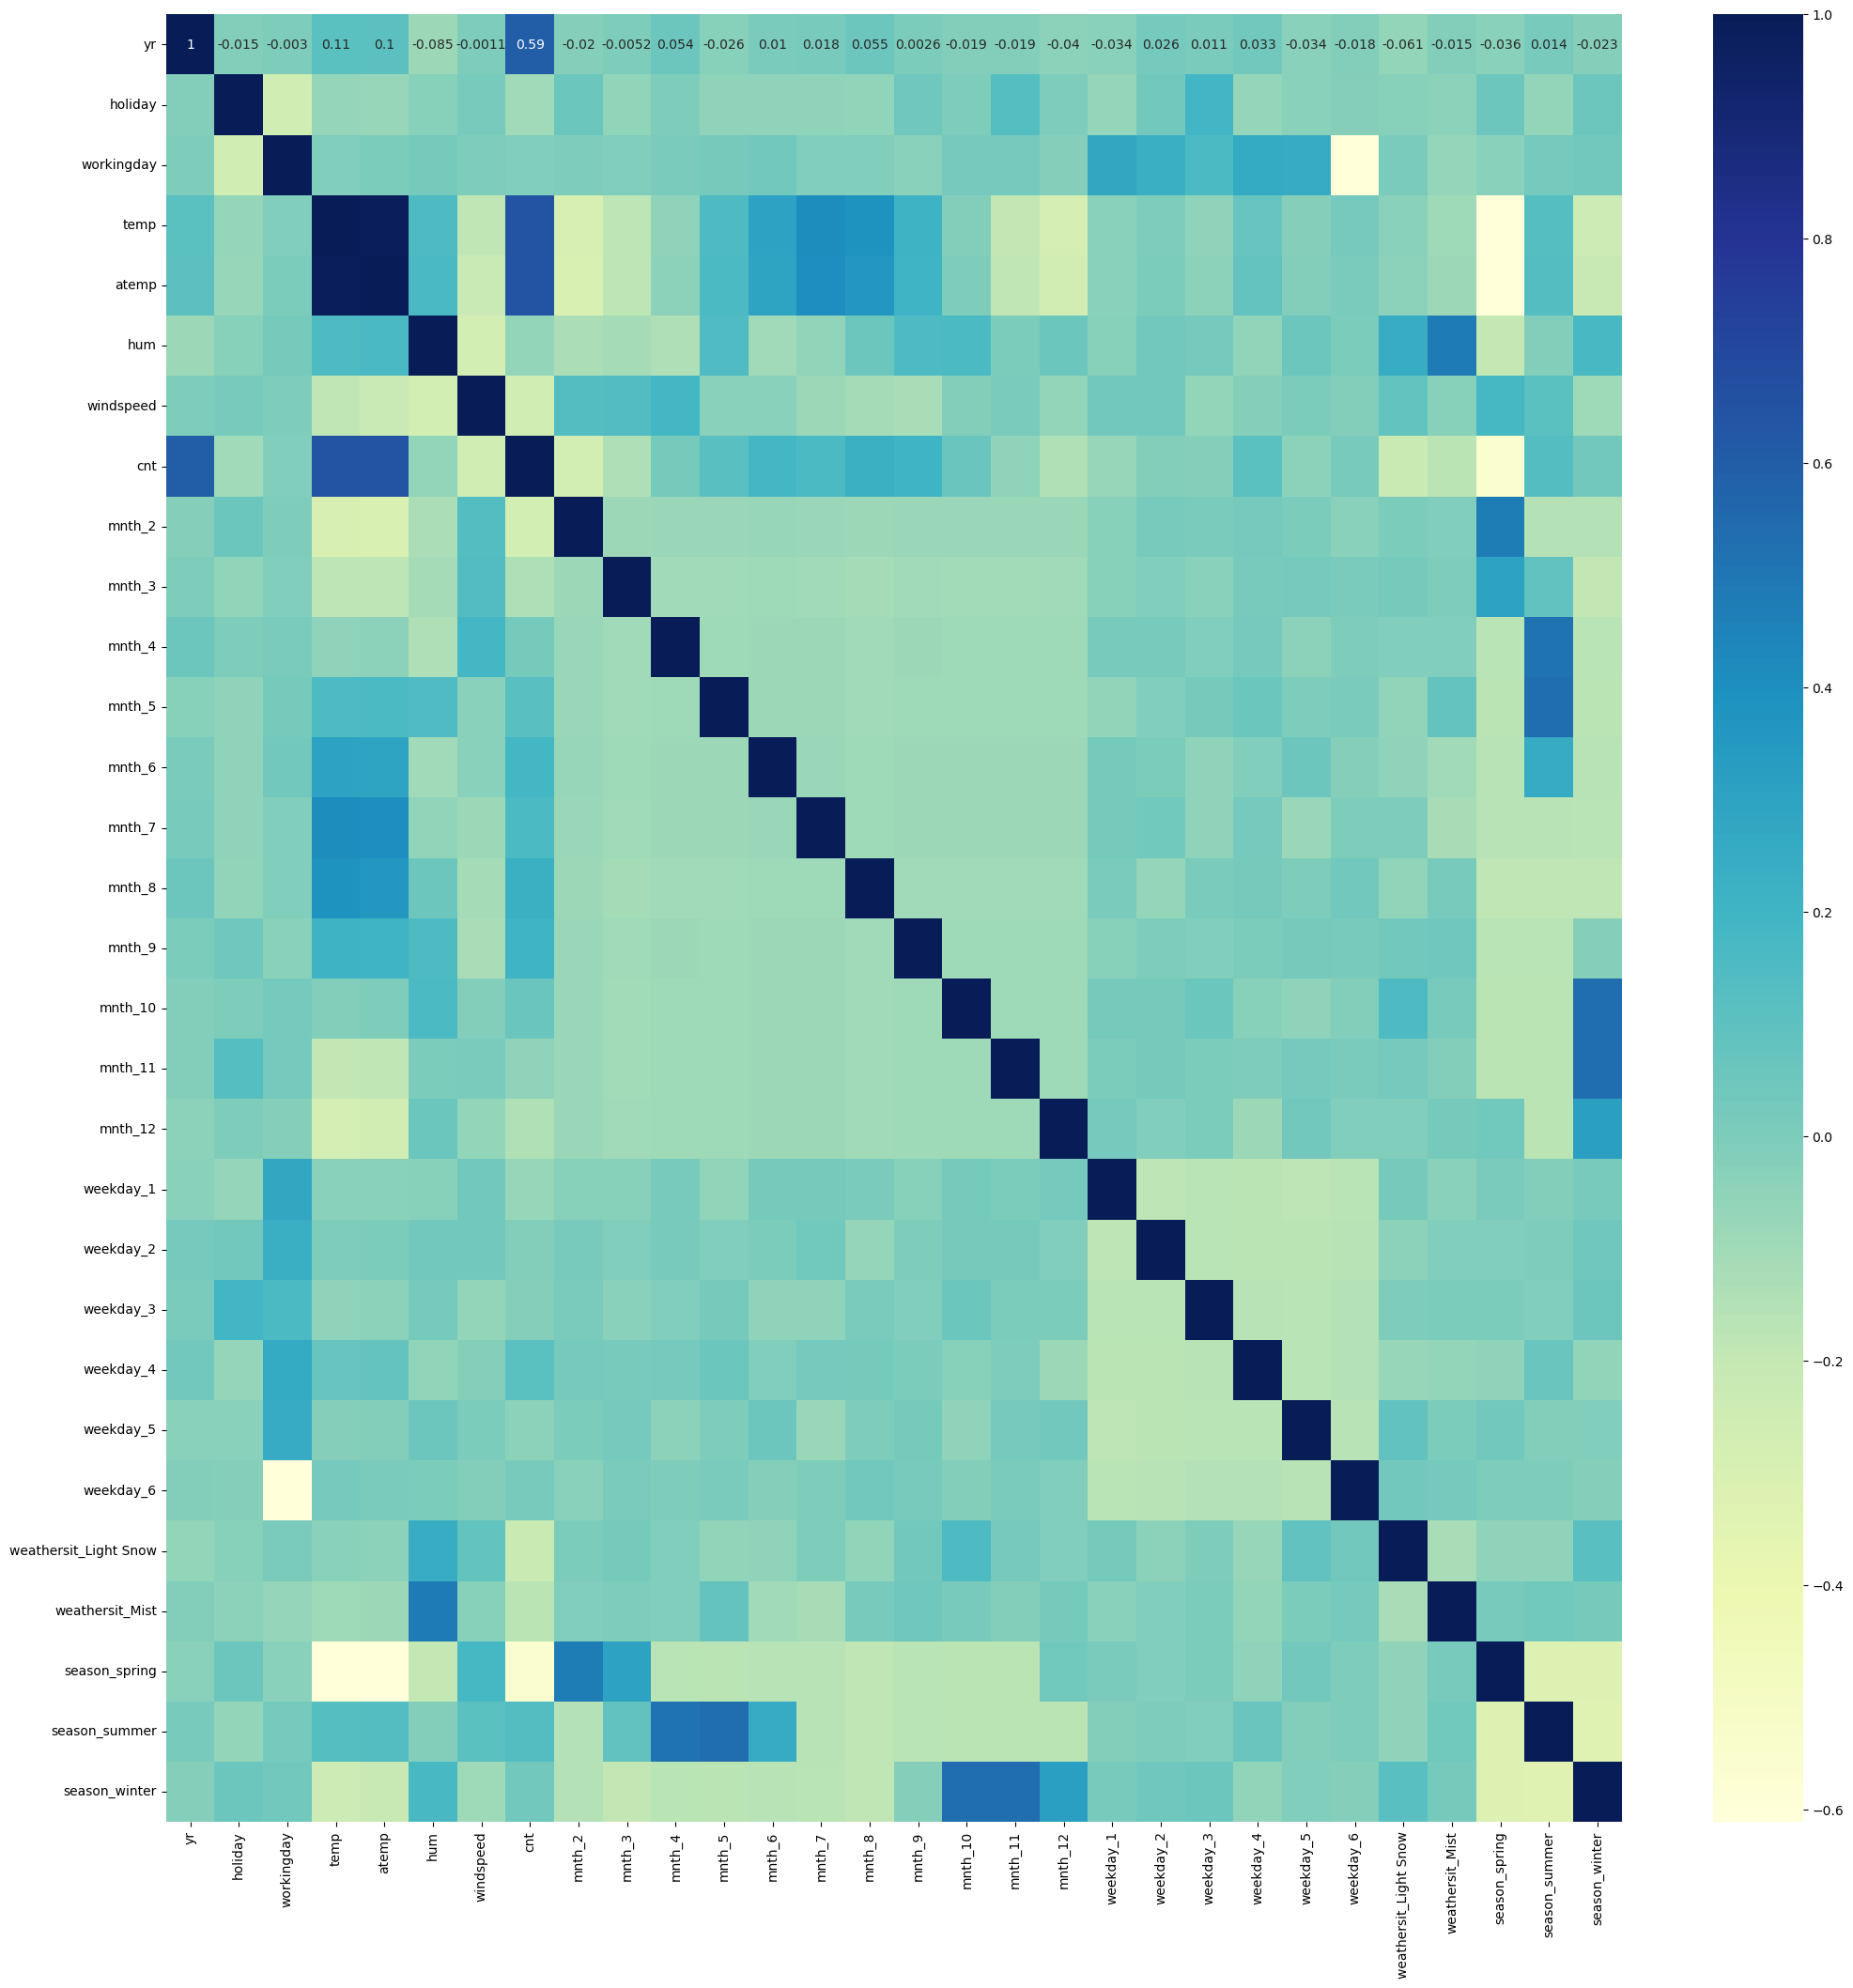

In [53]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [54]:
df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist,season_spring,season_summer,season_winter
yr,1.000000,-0.014980,-0.003005,0.107288,0.104206,-0.084792,-0.001108,0.591508,-1.991603e-02,-0.005172,...,0.026024,0.010995,0.032785,-3.419941e-02,-0.017733,-6.076399e-02,-0.015469,-0.036320,0.013856,-0.022638
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.070640,-0.029093,0.017569,-0.095961,5.652428e-02,-0.053321,...,0.034971,0.190636,-0.066102,-3.202785e-02,-0.025291,-2.815377e-02,-0.038279,0.053339,-0.063232,0.050712
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.003814,0.020701,-0.002504,-0.008723,-3.470925e-03,-0.008563,...,0.234321,0.163120,0.260091,2.520125e-01,-0.605864,8.289412e-03,-0.068924,-0.032886,0.030488,0.036097
temp,0.107288,-0.066282,-0.007643,1.000000,0.989537,0.155415,-0.187396,0.643517,-2.960214e-01,-0.179694,...,-0.001951,-0.046291,0.074973,-1.953999e-02,0.025276,-3.609266e-02,-0.090161,-0.605988,0.125582,-0.233697
atemp,0.104206,-0.070640,0.003814,0.989537,1.000000,0.169461,-0.215283,0.646475,-2.995091e-01,-0.178458,...,0.002815,-0.043377,0.078627,-1.873114e-02,0.012090,-4.426553e-02,-0.086069,-0.610741,0.135806,-0.211118
hum,-0.084792,-0.029093,0.020701,0.155415,0.169461,1.000000,-0.266895,-0.059993,-1.295442e-01,-0.110761,...,0.033548,0.026395,-0.056997,5.190849e-02,0.002783,2.450381e-01,0.481042,-0.201134,-0.013216,0.171579
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.215283,-0.266895,1.000000,-0.253794,1.331228e-01,0.142173,...,0.035616,-0.057518,-0.021502,2.133435e-03,-0.016284,8.689990e-02,-0.030385,0.180743,0.110089,-0.090649
cnt,0.591508,-0.095961,-0.008723,0.643517,0.646475,-0.059993,-0.253794,1.000000,-2.702870e-01,-0.137537,...,-0.018885,-0.019578,0.110430,-4.056563e-02,0.012496,-2.265984e-01,-0.175530,-0.548871,0.134343,0.032636
mnth_2,-0.019916,0.056524,-0.003471,-0.296021,-0.299509,-0.129544,0.133123,-0.270287,1.000000e+00,-0.088113,...,0.017471,0.009193,0.025438,-1.162758e-17,-0.032786,-3.099135e-17,-0.011038,0.471540,-0.152286,-0.153900
mnth_3,-0.005172,-0.053321,-0.008563,-0.179694,-0.178458,-0.110761,0.142173,-0.137537,-8.811342e-02,1.000000,...,-0.011854,-0.034020,0.015875,3.066480e-02,0.010400,2.066101e-02,-0.002179,0.305009,0.088068,-0.189849


As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

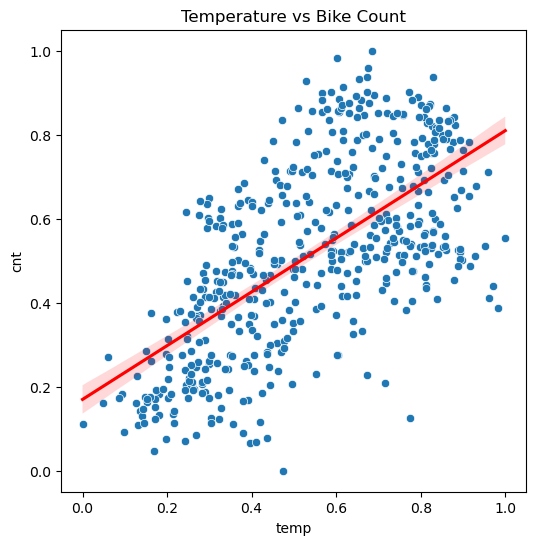

In [55]:
# Scatter plots with regression line for more insights on linear relationships
# Visualizing one of the correlation to see the trends via Reg plot.

plt.figure(figsize=(6, 6))
sns.scatterplot(x='temp', y='cnt', data=df_train)
sns.regplot(x='temp', y='cnt', data=df_train, scatter=False, color='red')
plt.title('Temperature vs Bike Count')
plt.show()

### Dividing into X and Y sets for the model building

In [56]:
# Split the dataset into training set
# Define your feature set and target variable
y_train = df_train.pop('cnt')
X_train = df_train

<h1 style='color:darkviolet'> Step 7: Model Building - Linear Regression

In [57]:
# Initialize the Linear Regression model
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Set up RFE with the linear model; here we choose 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

In [59]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [60]:
# Display the features selected by RFE
col = X_train.columns[rfe.support_]
print("Selected features:", col)

Selected features: Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_3', 'mnth_5',
       'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_Light Snow',
       'weathersit_Mist', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')


In [61]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [62]:
# Display feature rankings
feature_rankings = pd.Series(rfe.ranking_, index=X_train.columns)
print("Feature Rankings:\n", feature_rankings)

Feature Rankings:
 yr                        1
holiday                   1
workingday                5
temp                      1
atemp                     4
hum                       1
windspeed                 1
mnth_2                   11
mnth_3                    1
mnth_4                    2
mnth_5                    1
mnth_6                    3
mnth_7                   12
mnth_8                    1
mnth_9                    1
mnth_10                   1
mnth_11                  13
mnth_12                  14
weekday_1                 9
weekday_2                10
weekday_3                 8
weekday_4                 6
weekday_5                 7
weekday_6                15
weathersit_Light Snow     1
weathersit_Mist           1
season_spring             1
season_summer             1
season_winter             1
dtype: int32


In [63]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [64]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,mnth_3,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_Light Snow,weathersit_Mist,season_spring,season_summer,season_winter
653,1,0,0.509887,0.575354,0.300794,False,False,False,False,True,False,False,False,False,True
576,1,0,0.815169,0.725633,0.264686,False,False,False,False,False,False,False,False,False,False
426,1,0,0.442393,0.640189,0.255342,True,False,False,False,False,False,True,True,False,False
728,1,0,0.245101,0.498067,0.663106,False,False,False,False,False,False,False,True,False,False
482,1,0,0.395666,0.504508,0.188475,False,False,False,False,False,False,True,False,True,False


In [65]:
# Check data types
print(X_train_rfe.dtypes)

yr                         int64
holiday                    int64
temp                     float64
hum                      float64
windspeed                float64
mnth_3                      bool
mnth_5                      bool
mnth_8                      bool
mnth_9                      bool
mnth_10                     bool
weathersit_Light Snow       bool
weathersit_Mist             bool
season_spring               bool
season_summer               bool
season_winter               bool
dtype: object


**Convert Boolean Columns to Integer Type**

Convert bool types to int types explicitly before fitting the model. This avoids any internal type conversion issues that might not be handled as expected by statsmodels.

In [66]:
# Convert bool columns to int
bool_cols = X_train_rfe.columns[X_train_rfe.dtypes == 'bool']
X_train_rfe[bool_cols] = X_train_rfe[bool_cols].astype(int)

# Check data types again to confirm
print(X_train_rfe.dtypes)

yr                         int64
holiday                    int64
temp                     float64
hum                      float64
windspeed                float64
mnth_3                     int32
mnth_5                     int32
mnth_8                     int32
mnth_9                     int32
mnth_10                    int32
weathersit_Light Snow      int32
weathersit_Mist            int32
season_spring              int32
season_summer              int32
season_winter              int32
dtype: object


<h2 style='color:brown'> Building First Linear Regression model

In [67]:
import statsmodels.api as sm

# Add constant to the model
X_train_lm = sm.add_constant(X_train_rfe)

# Fit the OLS model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the regression
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 11 May 2024   Prob (F-statistic):          2.95e-189
Time:                        18:53:40   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

### Checking VIF

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.50
2,temp,15.39
4,windspeed,4.77
12,season_spring,4.72
14,season_winter,4.33
13,season_summer,3.85
11,weathersit_Mist,2.29
0,yr,2.10
7,mnth_8,1.80
6,mnth_5,1.64


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [69]:
# As mnth_5 shows high p-value hence let's drop it
X_train_new = X_train_rfe.drop(['mnth_5'], axis = 1)

<h2 style='color:brown'> Second Linear Regression model

In [70]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sat, 11 May 2024   Prob (F-statistic):          9.02e-190
Time:                        18:53:40   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

##### Dropping the variable and updating the model

As you can see from the summary, `season_spring` as it has a very high p-value of 0.106 Let's go ahead and drop this variable.

In [71]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['season_spring'], axis = 1)

#### Checking VIF

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
12,season_winter,2.34
10,weathersit_Mist,2.14
0,yr,2.02
11,season_summer,1.83
6,mnth_8,1.61
8,mnth_10,1.61
7,mnth_9,1.34


<h2 style='color:brown'> Third Linear regression model

In [73]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sat, 11 May 2024   Prob (F-statistic):          2.26e-190
Time:                        18:53:40   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

Let's drop `mnth_3` variable as it has high p-value.

In [74]:
# Dropping the variable
X_train_new = X_train_new.drop(['mnth_3'], axis = 1)

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
11,season_winter,2.27
9,weathersit_Mist,2.13
0,yr,2.02
10,season_summer,1.83
7,mnth_10,1.61
5,mnth_8,1.60
6,mnth_9,1.34


<h2 style='color:brown'> Fourth Linear regression model

In [76]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 11 May 2024   Prob (F-statistic):          6.02e-191
Time:                        18:53:40   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

Let's drop `mnth_10` variable as it has high p-value.

In [77]:
# Dropping the variabe
X_train_new = X_train_new.drop(['mnth_10'], axis = 1)

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.33
2,temp,9.66
4,windspeed,3.58
8,weathersit_Mist,2.13
0,yr,2.01
9,season_summer,1.82
10,season_winter,1.75
5,mnth_8,1.59
6,mnth_9,1.31
7,weathersit_Light Snow,1.16


<h2 style='color:brown'> Fifth Linear regression model

In [79]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sat, 11 May 2024   Prob (F-statistic):          4.43e-191
Time:                        18:53:40   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.33
2,temp,9.66
4,windspeed,3.58
8,weathersit_Mist,2.13
0,yr,2.01
9,season_summer,1.82
10,season_winter,1.75
5,mnth_8,1.59
6,mnth_9,1.31
7,weathersit_Light Snow,1.16


Let's drop `hum` variable as it has high VIF.

In [81]:
# Dropping the variable
X_train_new = X_train_new.drop(['hum'], axis = 1)

<h2 style='color:brown'> Sixth Linear Regression model

In [82]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.26e-187
Time:                        18:53:40   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
8,season_summer,1.81
4,mnth_8,1.58
9,season_winter,1.49
7,weathersit_Mist,1.48
5,mnth_9,1.31
6,weathersit_Light Snow,1.08
1,holiday,1.04


We can consider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

`F-statistic` value of `251.3` (which is greater than 1) and the `Prob (F-statistic)` of `1.26e-187` i.e almost equals to zero, states that the overall model is significant.

In [84]:
# Checking the parameters and their coefficient values
coefficients  = lr_6.params
coefficients

const                    0.131241
yr                       0.232489
holiday                 -0.097109
temp                     0.517361
windspeed               -0.149737
mnth_8                   0.054165
mnth_9                   0.116177
weathersit_Light Snow   -0.282834
weathersit_Mist         -0.082534
season_summer            0.099972
season_winter            0.138343
dtype: float64

 ### Visualize feature importance from the Linear Regression model

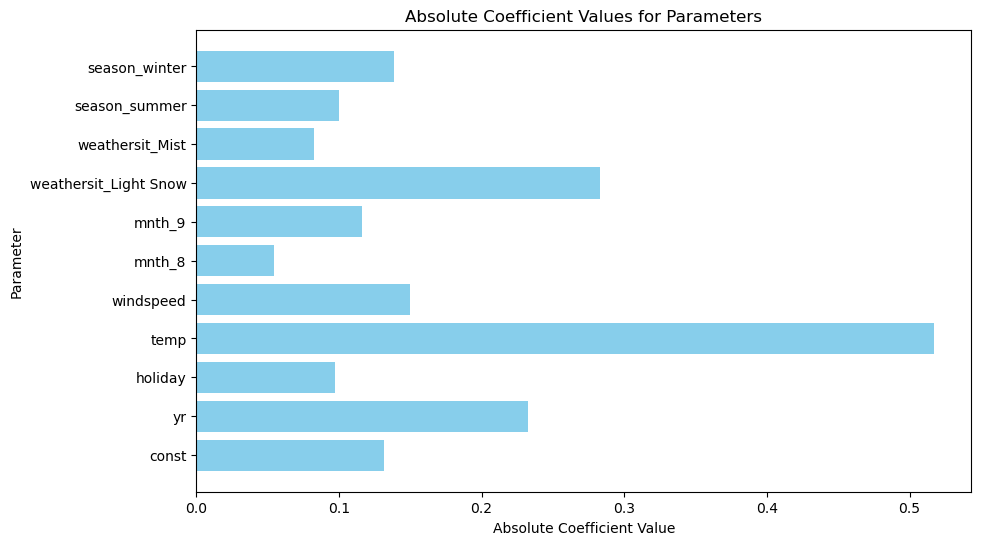

In [85]:
# Coefficients provided
coefficients = {
    'const': 0.131241,
    'yr': 0.232489,
    'holiday': -0.097109,
    'temp': 0.517361,
    'windspeed': -0.149737,
    'mnth_8': 0.054165,
    'mnth_9': 0.116177,
    'weathersit_Light Snow': -0.282834,
    'weathersit_Mist': -0.082534,
    'season_summer': 0.099972,
    'season_winter': 0.138343
}

# Convert coefficients to absolute values for better visualization
coefficients_abs = {key: abs(value) for key, value in coefficients.items()}

# Create figure and axis objects
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Plot coefficients
ax.barh(list(coefficients_abs.keys()), list(coefficients_abs.values()), color='skyblue')

# Add labels and title
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Parameter')
ax.set_title('Absolute Coefficient Values for Parameters')

# Show plot
plt.show()

<h1 style="color:green;"> Step 8: Residual Analysis of the train data and validation

In [86]:
X_train_lm_6.head()

,const,yr,holiday,temp,windspeed,mnth_8,mnth_9,weathersit_Light Snow,weathersit_Mist,season_summer,season_winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0


In [87]:
# Predicting on the train set
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

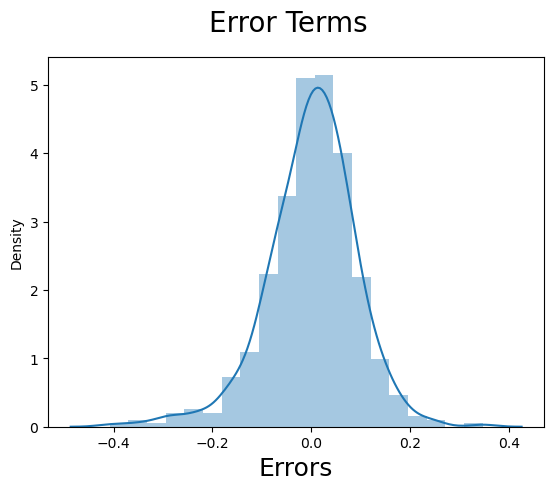

In [88]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

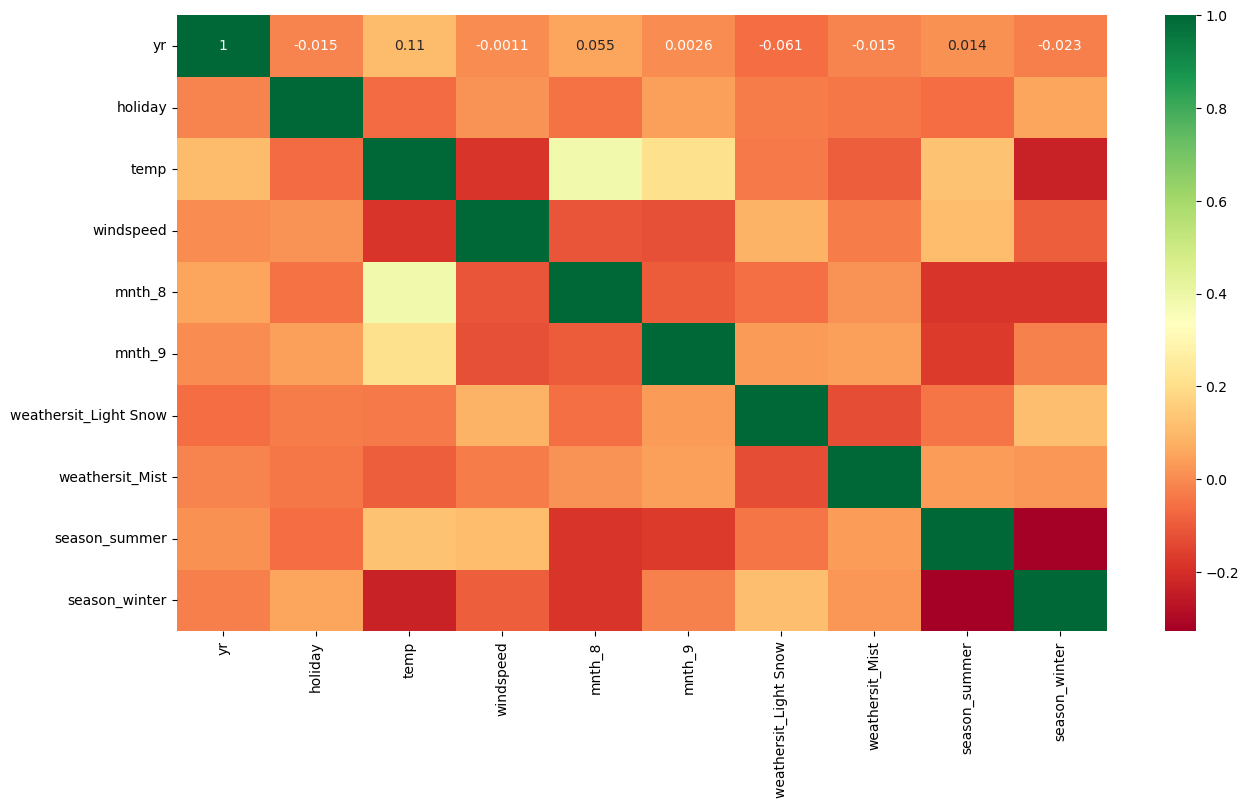

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

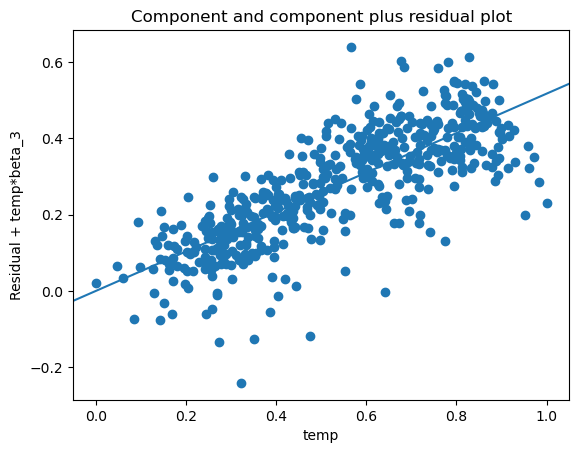

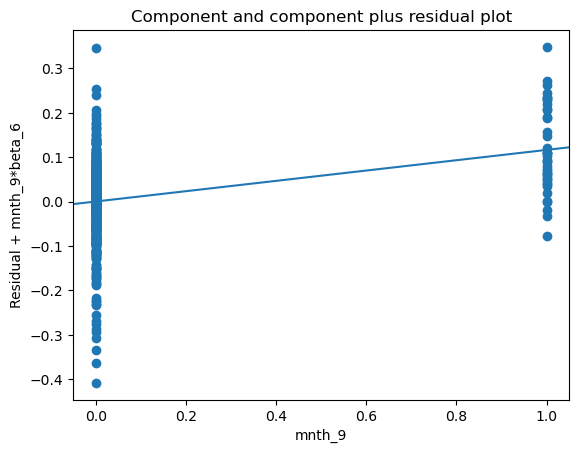

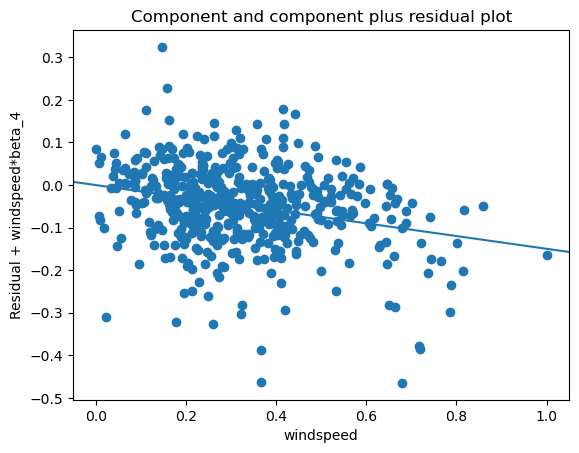

In [90]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'mnth_9')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

##### Homoscedasticity

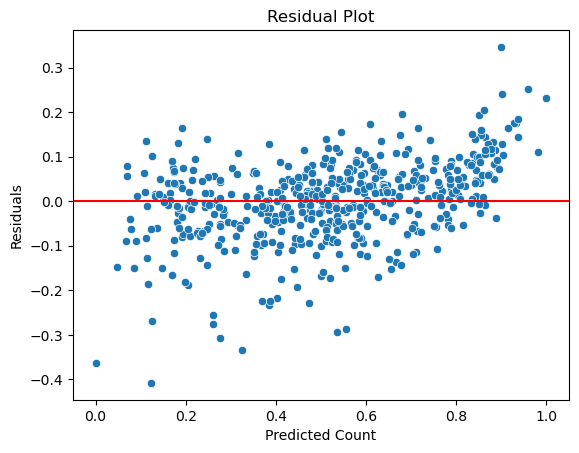

In [91]:
# Assuming y_train_pred and y_train are defined, calculate residuals
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred

# Corrected call to sns.scatterplot
sns.scatterplot(x=y_train, y=residual)
plt.axhline(y=0, color='red', linestyle='-')  # Draws a horizontal line at zero residual
plt.xlabel('Predicted Count')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

No visible pattern observed from above plot for residuals.

**Durbin-Watson = 2.051**

- **Interpretation:** A Durbin-Watson statistic of 2.051 is very close to 2, indicating that there is minimal or no autocorrelation in the residuals of your regression model. This result suggests that the residuals from the model are essentially random and independent from one another, which is an ideal scenario when using linear regression models.
- **Implication for Model:** The result is a good indication that your model does not violate the independence of residuals assumption, thus lending credibility to the regression analysis.

<h1 style="color:green;"> Step 9: Make Predictions 

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [92]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist,season_spring,season_summer,season_winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,True,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,True,False,False,False,False,False,True,False
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,False,False,True,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,False,False,...,False,False,False,True,False,False,False,False,False,False
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,False,False,True,False,False,False,True,False


In [93]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [94]:
y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [96]:
# Making predictions using the sixth model
y_pred = lr_6.predict(X_test_lm_6)

In [97]:
# Calculate R-squared value
r2= r2_score(y_test, y_pred)
print("R-squared on test set: ", r2)

R-squared on test set:  0.7931434526028904


<h1 style="color:green;"> Step 10: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

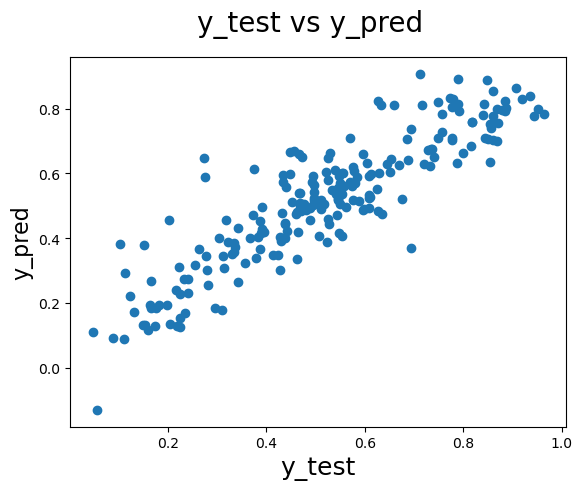

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [99]:
# Parameter coefficients
round(lr_6.params,3)

const                    0.131
yr                       0.232
holiday                 -0.097
temp                     0.517
windspeed               -0.150
mnth_8                   0.054
mnth_9                   0.116
weathersit_Light Snow   -0.283
weathersit_Mist         -0.083
season_summer            0.100
season_winter            0.138
dtype: float64


We can see that the equation of our best fitted line is:

$ cnt = 0.131 + 0.232  \times  yr - 0.097  \times  holiday + 0.517 \times temp - 0.150 \times windspeed + 0.054 \times mnth_8 + 0.116 \times mnth_9 - 0.283 \times weathersit_Light Snow - 0.083 \times weathersit_Mist + 0.100 \times season_summer + 0.138 \times season_winter $


In [100]:
# Calculate Adjusted R-squared for the test set
n = X_test.shape[0]  # number of observations in the test set
p = X_test.shape[1]  # number of predictors; make sure X_test does not include the intercept

adjusted_r_squared_test = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared for Test Set: {adjusted_r_squared_test}")

Adjusted R-squared for Test Set: 0.7831984262857217


In [101]:
# Convert Data Types: If needed, convert the data types of y_test and y_pred to numeric types.
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)

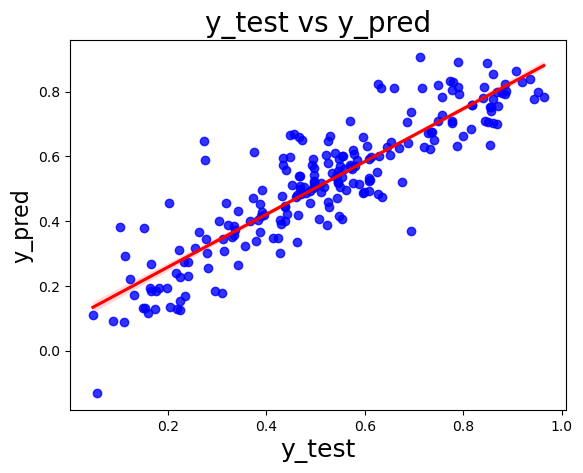

In [102]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.834
    - Test dataset R^2           : 0.7931
    - Train dataset Adjusted R^2 : 0.831  
    - Test dataset Adjusted R^2  : 0.7831

#### Demand of bikes depend on year, holiday, temp, windspeed, mnth_8, mnth_9 , Light_snowrain, Misty, summer and winter.


In [103]:
lr_6.params

const                    0.131241
yr                       0.232489
holiday                 -0.097109
temp                     0.517361
windspeed               -0.149737
mnth_8                   0.054165
mnth_9                   0.116177
weathersit_Light Snow   -0.282834
weathersit_Mist         -0.082534
season_summer            0.099972
season_winter            0.138343
dtype: float64

<h1 style="color:green;"> BUSINESS RECOMMENDATIONS

1. **Year (yr):** The coefficient for the year variable suggests that there has been an increase in demand for shared bikes over time (from 2018 to 2019). This could indicate a growing market or increased awareness and adoption of bike-sharing services. To capitalize on this trend, the company should continue to invest in expanding its bike-sharing infrastructure and marketing efforts.


2. **Temperature (temp):** The positive coefficient for temperature indicates that warmer temperatures are associated with higher demand for shared bikes. During warmer months, the company should consider increasing the availability of bikes, optimizing bike maintenance schedules, and launching promotional campaigns to attract more users.

3. **Weather Conditions (weathersit):** The negative coefficients for "Light Snow" and "Mist" weather conditions suggest that adverse weather conditions reduce bike demand. During periods of inclement weather, the company could offer incentives such as discounts or promotions to encourage bike usage, or alternatively, focus on indoor marketing initiatives.

4. **Holiday:** The negative coefficient for the holiday variable indicates a slight decrease in bike demand on holidays. However, this effect may vary depending on the type of holiday and local cultural practices. The company could conduct further analysis to understand holiday-specific patterns and tailor marketing strategies accordingly.

5. **Seasonality (mnth_8, mnth_9, season_summer, season_winter):** Positive coefficients for these variables suggest that demand for shared bikes tends to increase during certain seasons or months, such as summer and winter. Understanding seasonal patterns can help the company allocate resources effectively, such as adjusting bike inventory levels and staffing schedules to meet peak demand periods.

6. **Windspeed:** The negative coefficient for windspeed suggests that higher wind speeds are associated with reduced bike demand. While wind is a natural phenomenon that cannot be controlled, the company could consider implementing strategies to mitigate its impact, such as offering wind-resistant bike designs or providing alternative transportation options during windy conditions.

7. **Constant (const):** The intercept term represents the baseline demand for shared bikes when all other predictors are zero. It provides valuable information about the minimum level of demand that the company can expect to receive. By understanding this baseline demand, the company can set realistic revenue targets and allocate resources accordingly.